# Index


 <ul>
<b>1. Import Necessary Libraries</b>
</ul>
<ul>
<b>2. Read In and Explore the Data</b>
   <li> Imputing missing values </li>  <li> Deleting duplicate rows  </li>
</ul>

<ul>
<b>3. Exploratory Data Analysis Data Visualization</b><br>
    A.Univariate analysis
     <li>i.   Catplots- for categoical features</li>
     <li> ii.  PDFs</li>
     
    B.Bivariate analysis 
     <li>i.  Catlot</li>
     <li>ii.  Boxplot</li>
     <li> iii.  Inter Quantile range </li>
     <li>iv. Violinplot</li>
      <li>v. Pairplot</li>
      <li>vi. Scatterplot</li>
</ul>   
 
<ul>
<b>4. Data pre-processing and cleaning</b> <br>
  <li>  A.Removing outliers manually</li>
       using where clause on dataframes
   <li> B.Converting all features to numerical feature</li> 
  <li>  C.Removing Unwanted columns</li>
   <li> D.Removing outliers using standard methods
      using zscore</li>
  <li>  E. Train_test split</li>
   <li>  F. Scalling the Fetures using Standarscalar</li>
</ul>    

<ul>
<b>5. Building Models </b><br>
   <li>  A.KNN</li>
    <li> B.Linear Regression</li>
    <li> C.Logistic Regression</li>
   <li>   D.SVM</li>
    <li>  E.Decision Tree</li>
    <li>  F.Ensembles</li>
     <ul> i.  Bagging - Randomforest</ul>   
     <ul> ii. Boosting - GBDT</ul>
     <ul> iii.Stacking -Using SGDclassifier and Stackingclassifier in mlxtend</ul>
    <ul>  iv. Xgboost</ul>
    <li> G.Naive Bayes</li>
</ul>     

<ul>
<b>6. Model Comparison and finding best model</b><br>
 </ul>   
<ul>
<b>7. Creating Submission File with best model</b><br>
</ul>

# 1. Import Necessary Libraries

In [635]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, auc,classification_report,accuracy_score
from sklearn.metrics import mean_squared_error ,mean_absolute_error,log_loss
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# 2. Read In and Explore the Data

In [636]:
#converting into dataframe
df = pd.read_csv('wine.csv')

In [637]:
df.shape

(1599, 12)

In [638]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [639]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

### Imputing Missing Values with Medians

In [640]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [641]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [642]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [643]:
# Categories the output variable
bins = (3, 5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [644]:
df.dtypes

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                 category
dtype: object

In [645]:
df['quality'].value_counts()

good    855
bad     734
Name: quality, dtype: int64

In [646]:
df.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality  
0      9.4     bad  
1      9.8     bad  
2      9.8     bad  
3      9.8    good  
4      9.4     bad

# 3. Exploratory Data Analysis Data Visualization

## A.Univariate analysis

## i. Histograms /Categorical Plots

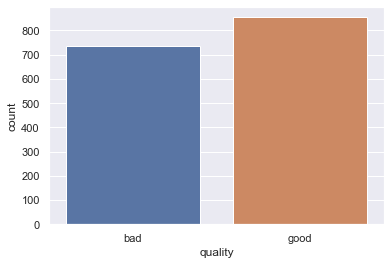

In [598]:
sns.set(style="darkgrid")
ax = sns.countplot(x="quality", data=df)

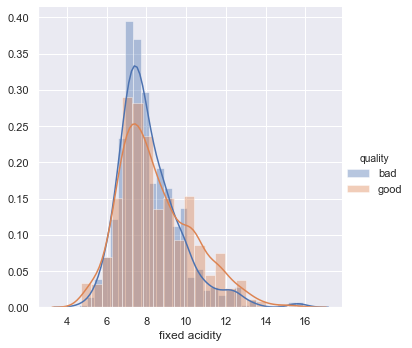

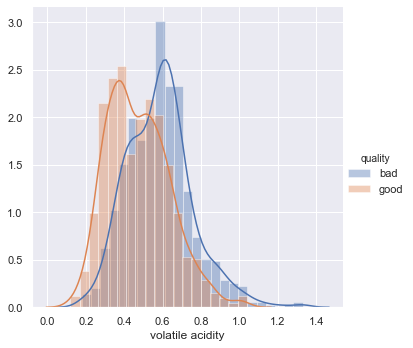

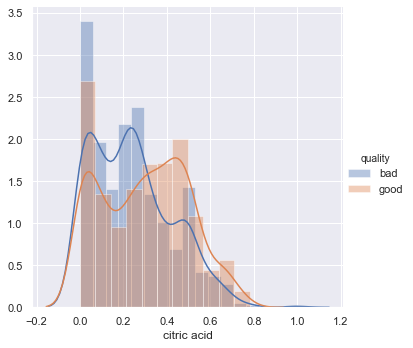

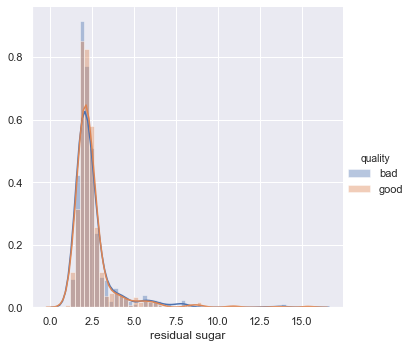

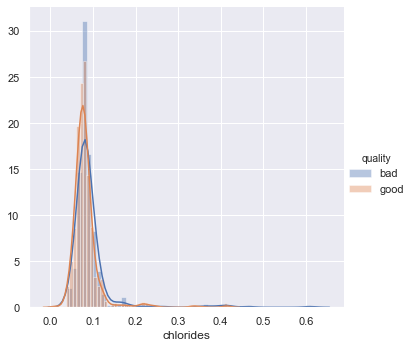

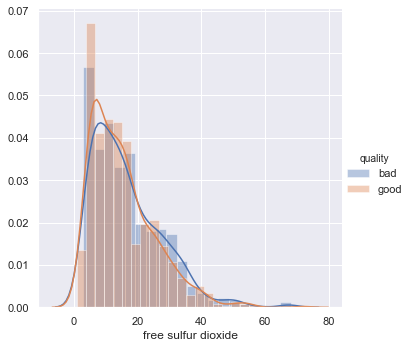

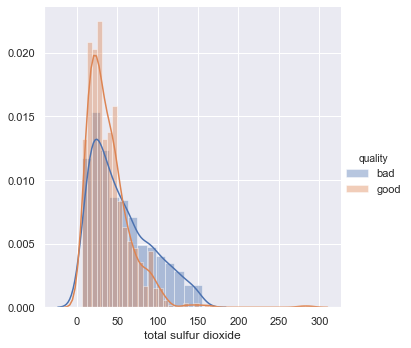

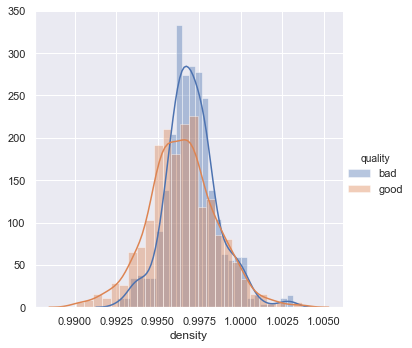

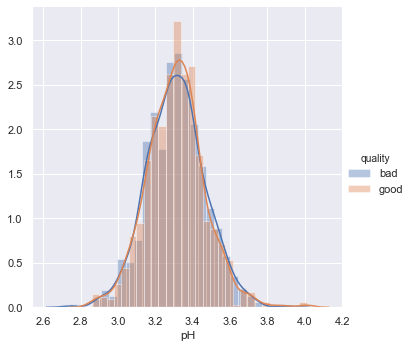

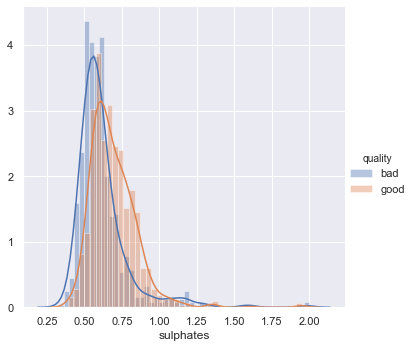

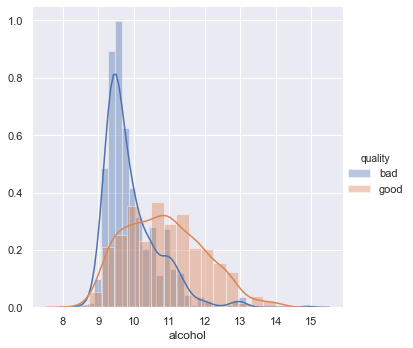

In [599]:
components=df.drop(['quality'],axis=1).columns
for comp in components:
    sns.FacetGrid(df,hue='quality',height=5)\
        .map(sns.distplot,comp)\
        .add_legend();
    plt.show()

## B. Bivariate analysis

### What is effect of each component on wine quality?

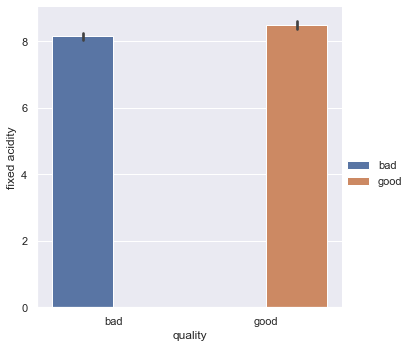

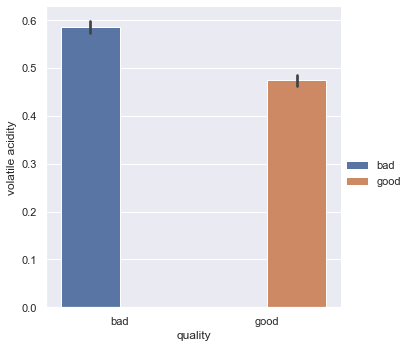

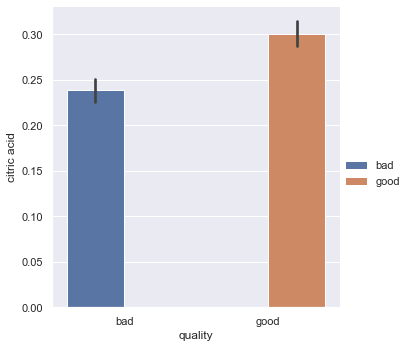

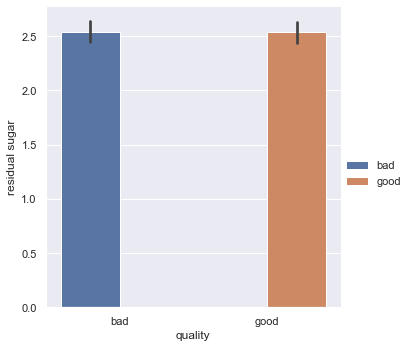

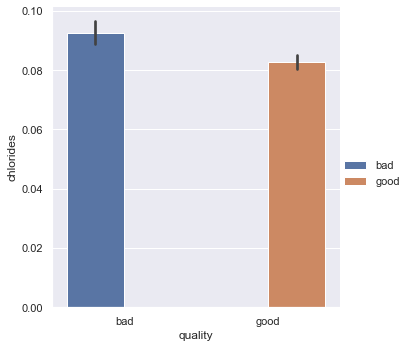

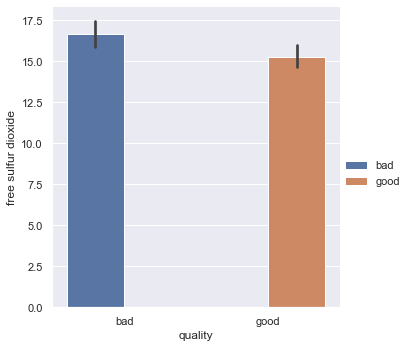

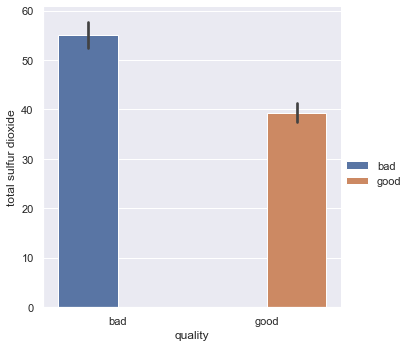

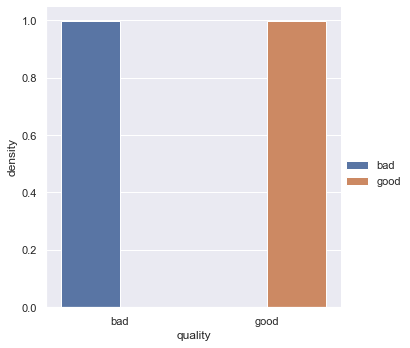

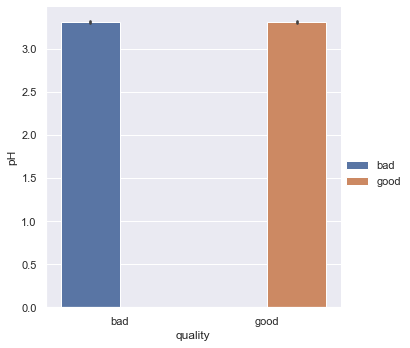

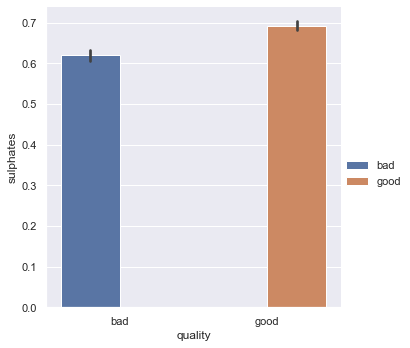

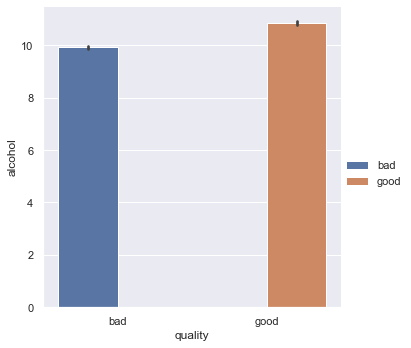

In [213]:
components=df.drop(['quality'],axis=1).columns
for comp in components:
    sns.catplot(x="quality", y=comp,hue="quality", kind="bar", data=df)\
             .add_legend();

### What Concentration of each component makes wine good or bad ? What should be the mean concentration of component to make good wine?

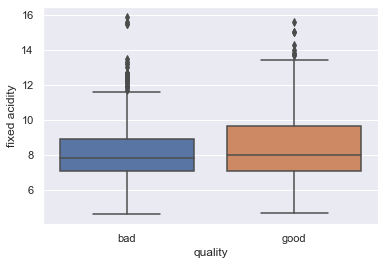

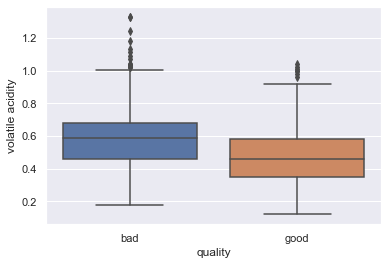

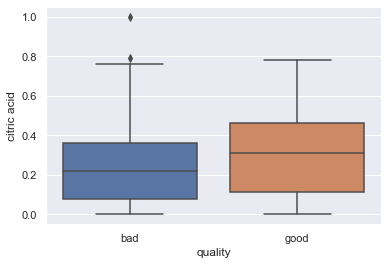

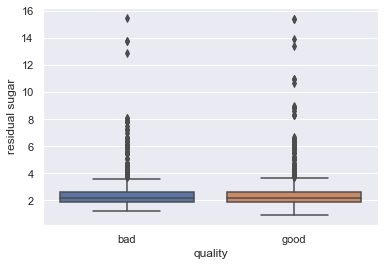

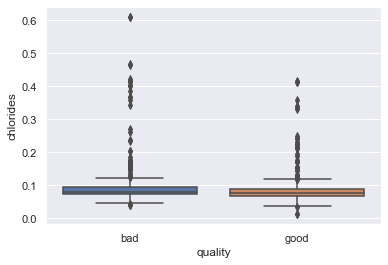

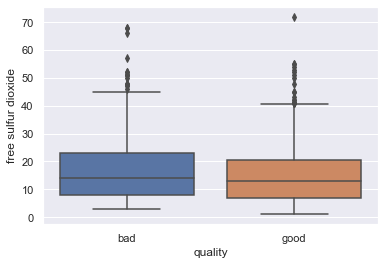

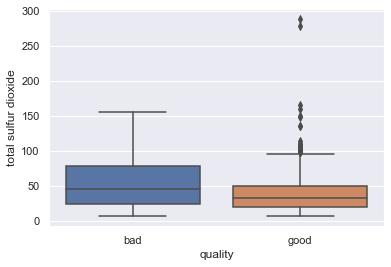

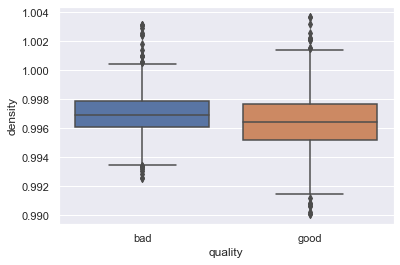

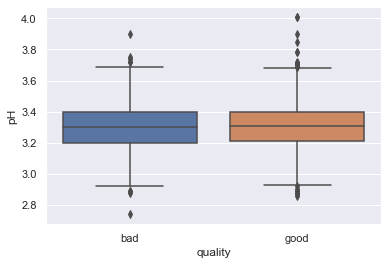

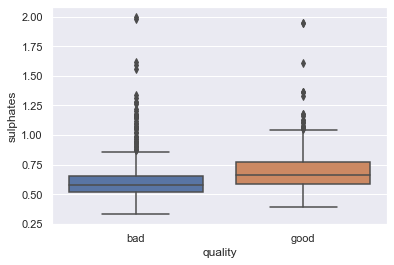

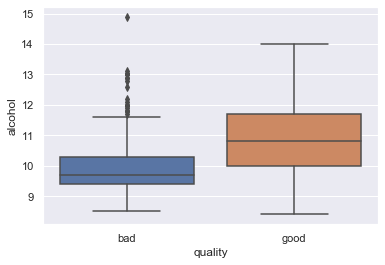

In [214]:
components=df.drop(['quality'],axis=1).columns
for comp in components:
        sns.boxplot(x='quality',y=comp,data=df)
        plt.show()

wecan see the outliers so lets try to quantity those using quantiles

In [215]:
components=df.drop(['quality'],axis=1).columns
for comp in components:
    print("Quantiles for", comp)
    for i in range(95,101):
        print(i,np.round(np.percentile(df[comp],i),3))

Quantiles for fixed acidity
95 11.8
96 12.0
97 12.4
98 12.7
99 13.3
100 15.9
Quantiles for volatile acidity
95 0.84
96 0.87
97 0.9
98 0.96
99 1.02
100 1.58
Quantiles for citric acid
95 0.6
96 0.64
97 0.66
98 0.68
99 0.7
100 1.0
Quantiles for residual sugar
95 5.1
96 5.6
97 6.006
98 6.604
99 8.306
100 15.5
Quantiles for chlorides
95 0.126
96 0.153
97 0.174
98 0.226
99 0.36
100 0.611
Quantiles for free sulfur dioxide
95 35.0
96 37.0
97 39.0
98 42.0
99 50.02
100 72.0
Quantiles for total sulfur dioxide
95 112.1
96 119.08
97 127.0
98 135.0
99 145.0
100 289.0
Quantiles for density
95 1.0
96 1.0
97 1.0
98 1.001
99 1.002
100 1.004
Quantiles for pH
95 3.57
96 3.58
97 3.601
98 3.66
99 3.7
100 4.01
Quantiles for sulphates
95 0.93
96 0.971
97 1.05
98 1.13
99 1.26
100 2.0
Quantiles for alcohol
95 12.5
96 12.608
97 12.8
98 12.9
99 13.4
100 14.9


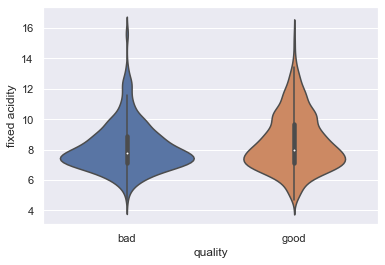

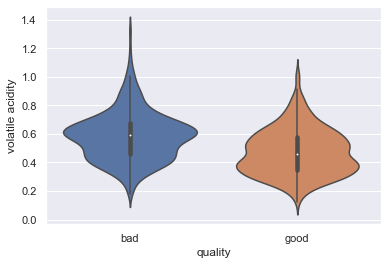

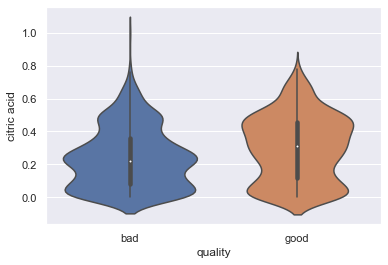

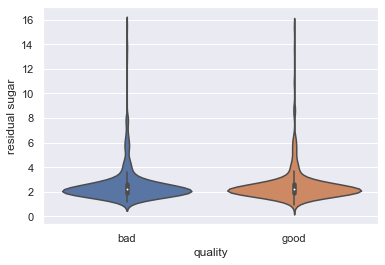

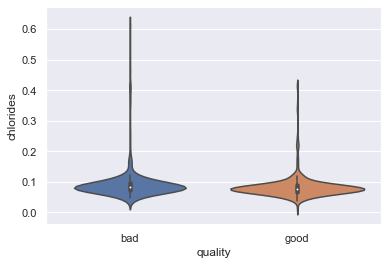

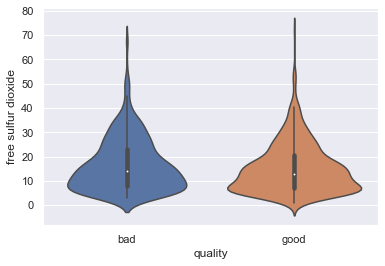

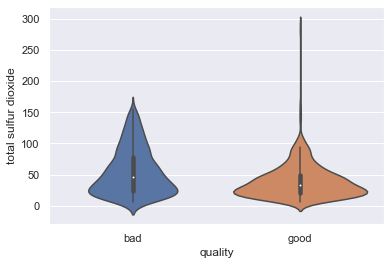

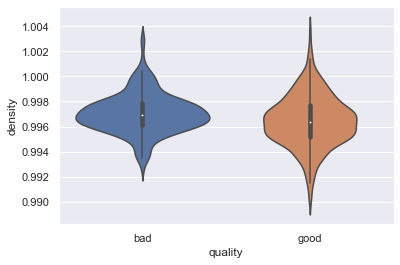

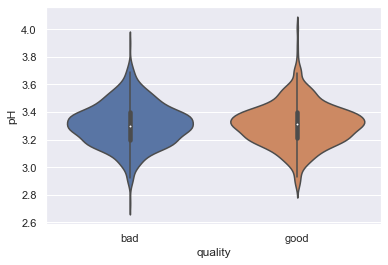

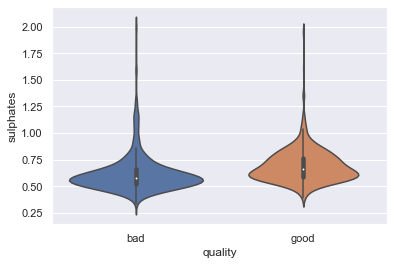

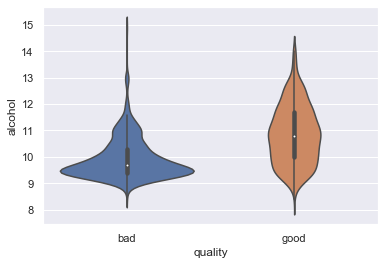

In [216]:
components=df.drop(['quality'],axis=1).columns
for comp in components:
    sns.violinplot(x='quality',y=comp,data=df)
    plt.show()

<b>Summary :<br></b>
1.From above two plots it is clear that more is the concentration of <b>alchohol</b>, <b>citric acid </b>and <b>sulphates</b> makes the wine of good quality.<br>
    
2.While on other hand bad wine has <b>high volatile acidity </b>and high concentration of <b>free sulffur dioxide</b> and <b>total sulffur dioxide</b>

3.There are outliers also in fetures and some features are seems to be skewed

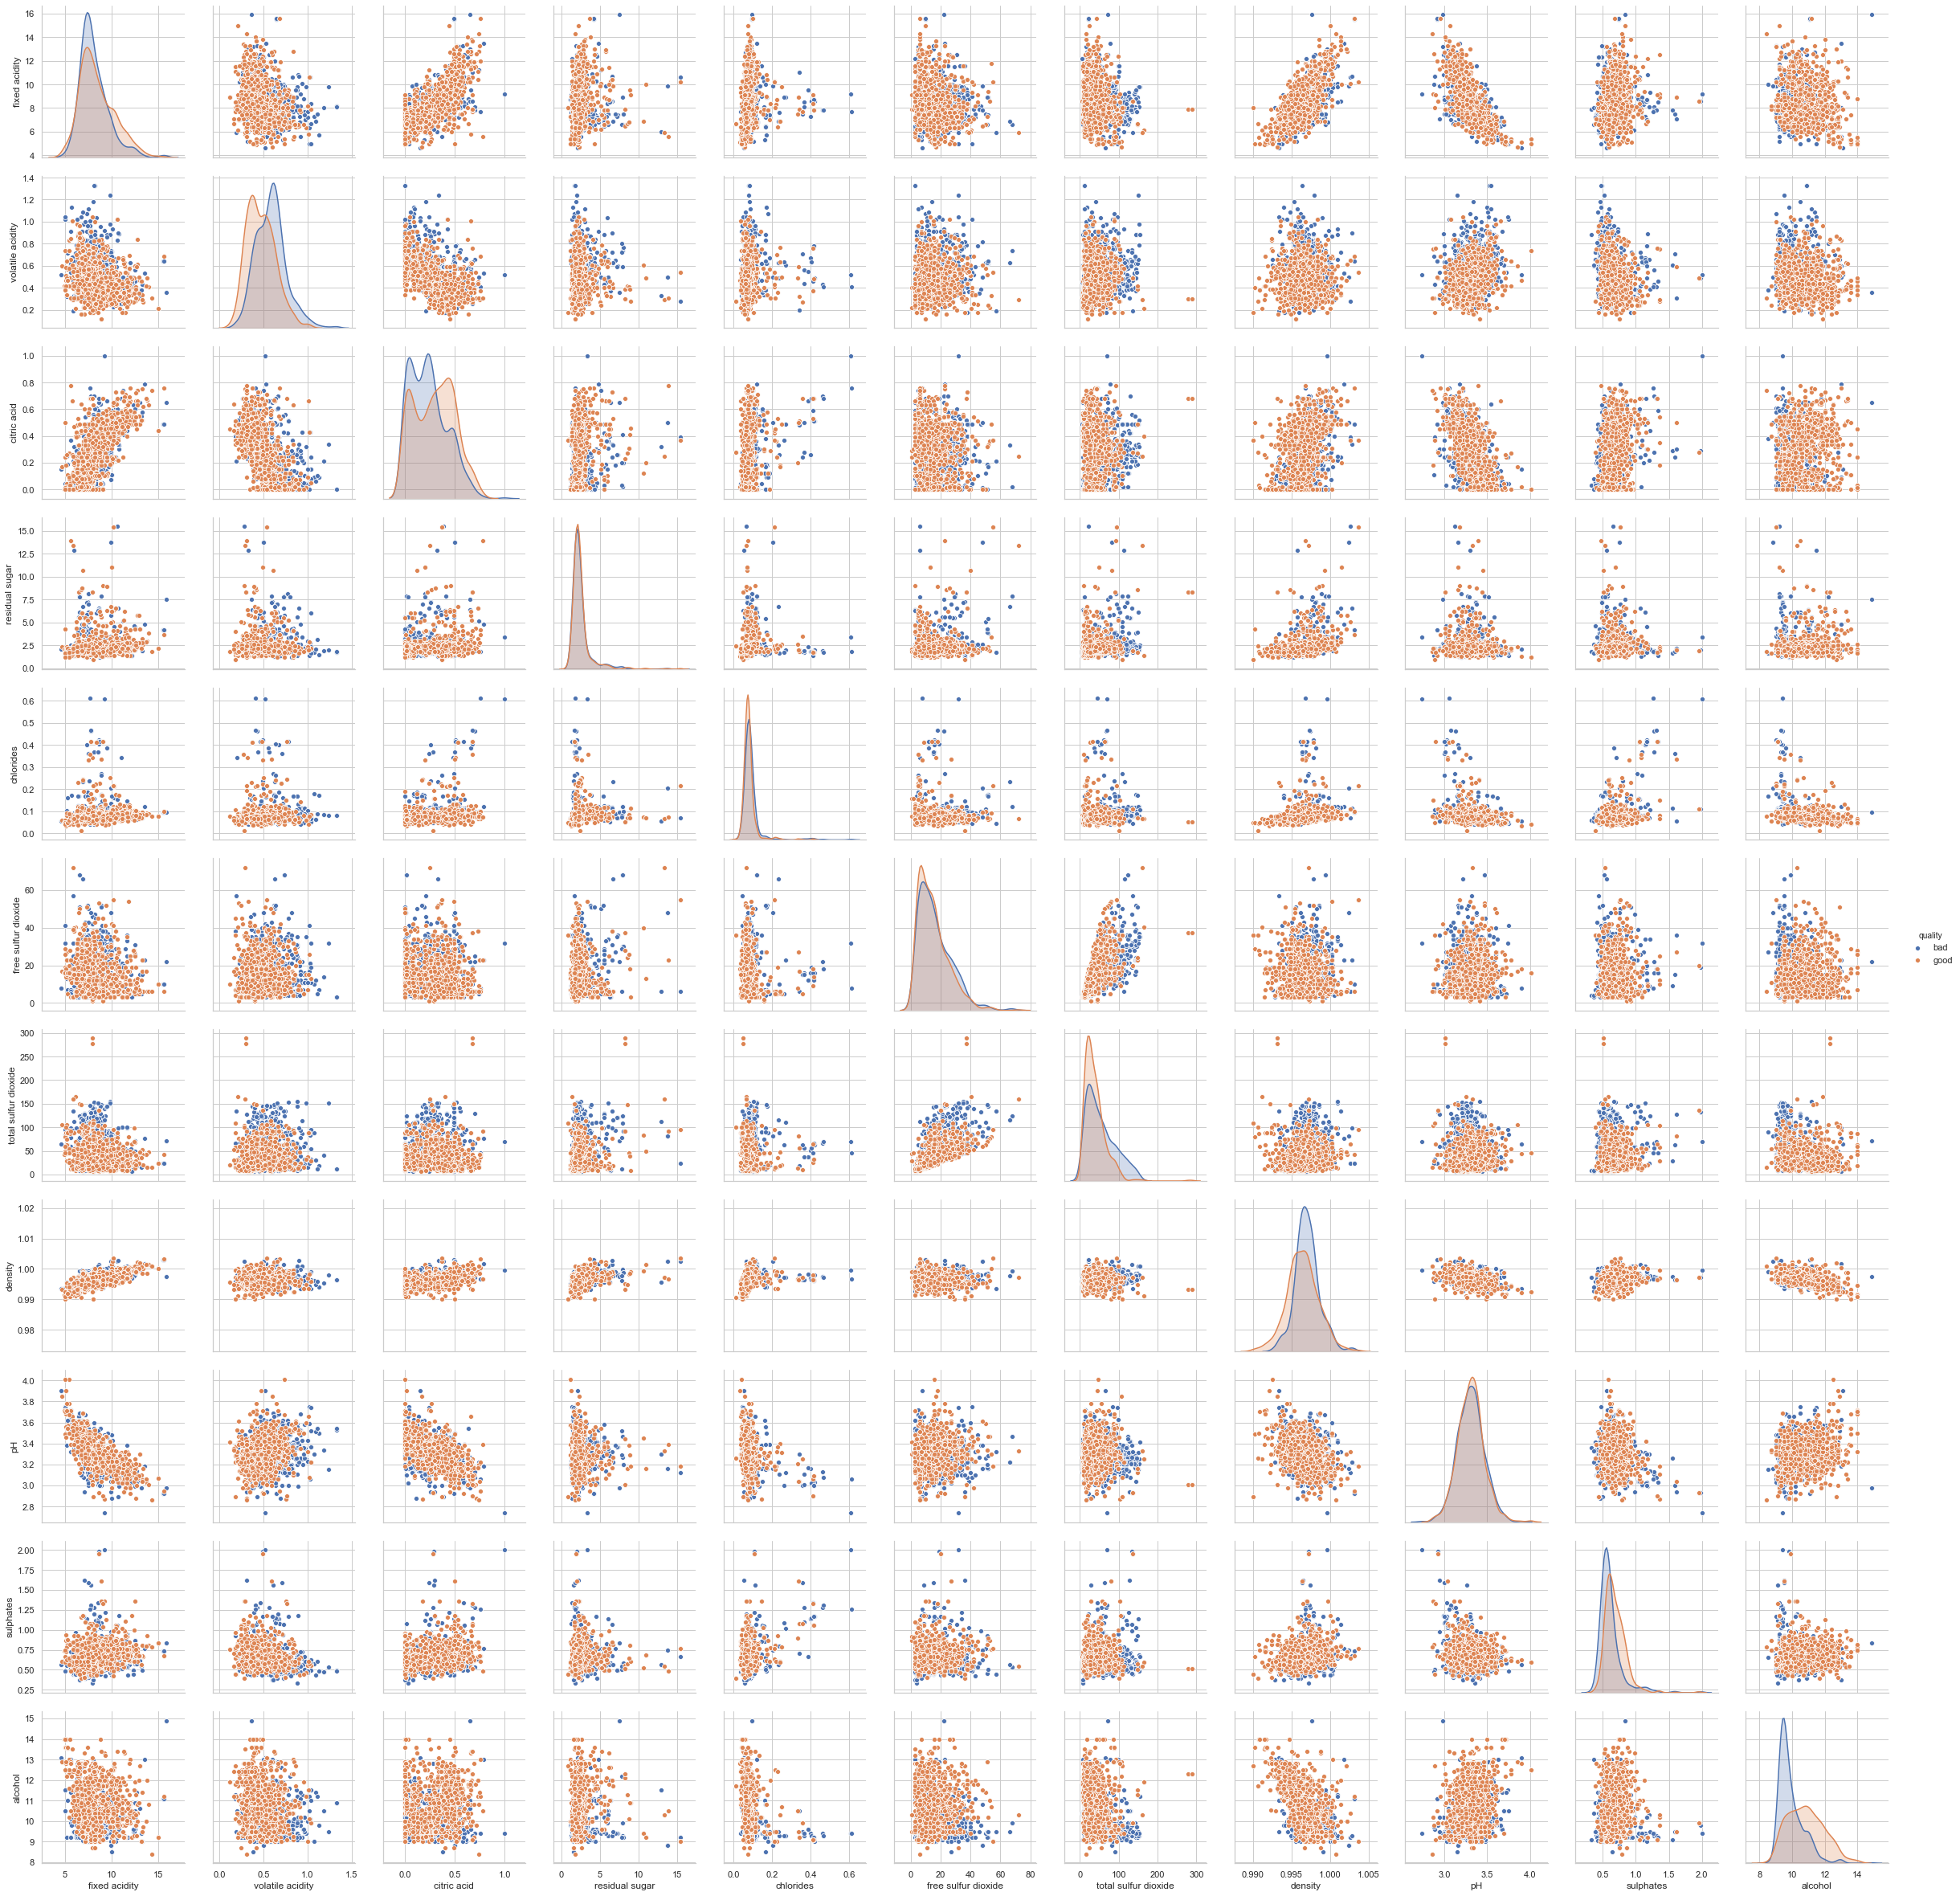

In [217]:
components=df.drop(['quality'],axis=1).columns

sns.set_style("whitegrid");               #Step1:Set the gird to white.
sns.pairplot(df, hue="quality",vars=components ,height=3); #.pairplot(dataset,hue='',size=n) function to plot pairplot
plt.show()

In [218]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Scatter plot with color encoding:


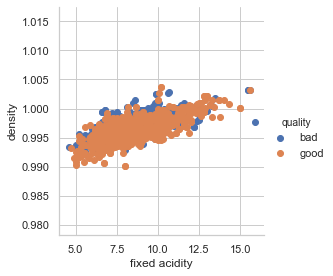

In [219]:
print('Scatter plot with color encoding:')
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='quality',height=4)\
   .map(plt.scatter,'fixed acidity','density')\
   .add_legend();
plt.show();
plt.close();

Scatter plot with color encoding:


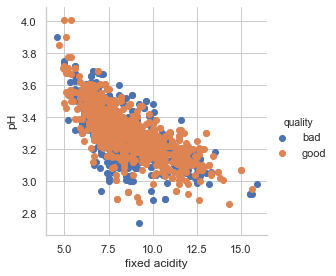

In [220]:
print('Scatter plot with color encoding:')
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='quality',height=4)\
   .map(plt.scatter,'fixed acidity','pH')\
   .add_legend();
plt.show();
plt.close();

Summary :<br>
1.There is no such clear sepration in data .<br>
2.but we can see linear relation between density and fixed acidity,as density increase fixed acidity also increase <br>
3.There is also negative linear relation between fixed acidity and pH

# 4. Data pre-processing and cleaning

## A.Converting all features to numerical features 

In [647]:
cleanup_nums ={"bad": 0, "good": 1}
df.replace(cleanup_nums, inplace=True)

In [648]:
df['quality'].value_counts()

1.0    855
0.0    734
Name: quality, dtype: int64

## B. Normalize all features

In [649]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()



normalizer.fit(df['fixed acidity'].values.reshape(1,-1))
fidfed_acidity_tranformed = normalizer.transform(df['fixed acidity'].values.reshape(1,-1))

normalizer.fit(df['volatile acidity'].values.reshape(1,-1))
volatile_acidity_tranformed = normalizer.transform(df['volatile acidity'].values.reshape(1,-1))

normalizer.fit(df['citric acid'].values.reshape(1,-1))
citric_acid_tranformed = normalizer.transform(df['citric acid'].values.reshape(1,-1))

normalizer.fit(df['residual sugar'].values.reshape(1,-1))
residual_sugar_tranformed = normalizer.transform(df['residual sugar'].values.reshape(1,-1))

normalizer.fit(df['chlorides'].values.reshape(1,-1))
chlorides_tranformed = normalizer.transform(df['chlorides'].values.reshape(1,-1))

normalizer.fit(df['free sulfur dioxide'].values.reshape(1,-1))
free_sulfur_diodfide_tranformed = normalizer.transform(df['free sulfur dioxide'].values.reshape(1,-1))

normalizer.fit(df['total sulfur dioxide'].values.reshape(1,-1))
total_sulfur_diodfide_tranformed = normalizer.transform(df['total sulfur dioxide'].values.reshape(1,-1))

normalizer.fit(df['density'].values.reshape(1,-1))
density_tranformed = normalizer.transform(df['density'].values.reshape(1,-1))

normalizer.fit(df['pH'].values.reshape(1,-1))
pH_tranformed = normalizer.transform(df['pH'].values.reshape(1,-1))

normalizer.fit(df['sulphates'].values.reshape(1,-1))
sulphates_tranformed = normalizer.transform(df['sulphates'].values.reshape(1,-1))

normalizer.fit(df['alcohol'].values.reshape(1,-1))
alcohol_tranformed = normalizer.transform(df['alcohol'].values.reshape(1,-1))



In [650]:
df['fixed acidity']=fixed_acidity_tranformed.transpose()
df['volatile acidity']=volatile_acidity_tranformed.transpose()
df['citric acid']=citric_acid_tranformed.transpose()
df['residual sugar']=residual_sugar_tranformed.transpose()
df['chlorides']=chlorides_tranformed.transpose()
df['free sulfur dioxide']=free_sulfur_dioxide_tranformed.transpose()
df['total sulfur dioxide']=total_sulfur_dioxide_tranformed.transpose()
df['density']=density_tranformed.transpose()
df['pH']=pH_tranformed.transpose()
df['sulphates']=sulphates_tranformed.transpose()
df['alcohol']=alcohol_tranformed.transpose()


In [651]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.021772          0.031409     0.000000        0.016363   0.019136   
1       0.022949          0.039485     0.000000        0.022391   0.024676   
2       0.022949          0.034101     0.002998        0.019808   0.023165   
3       0.032952          0.012563     0.041968        0.016363   0.018885   
4       0.021772          0.031409     0.000000        0.016363   0.019136   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.014471              0.014936  0.025034  0.026481   0.020606   
1             0.032889              0.029433  0.025009  0.024142   0.025022   
2             0.019733              0.023722  0.025014  0.024595   0.023918   
3             0.022364              0.026358  0.025039  0.023841   0.021342   
4             0.014471              0.014936  0.025034  0.026481   0.020606   

    alcohol  quality  
0  0.022436      0.0  
1  0.023391      0.0  
2  0.023391      0.0  
3  0.023391      1.0  
4  0.022436      0.0

In [652]:
df.mean()

fixed acidity           0.024478
volatile acidity        0.023683
citric acid             0.020308
residual sugar          0.021864
chlorides               0.022024
free sulfur dioxide     0.020884
total sulfur dioxide    0.020413
density                 0.025008
pH                      0.024981
sulphates               0.024218
alcohol                 0.024878
quality                 0.538074
dtype: float64

## D. Train_Test split

In [653]:
y=df['quality']
x=df.drop(['quality'],axis=1)

In [654]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [655]:
round(X_train, 2)
round(y_train, 2)

548     1.0
355     1.0
1296    0.0
209     1.0
140     0.0
       ... 
1130    1.0
1294    1.0
860     0.0
1459    1.0
1126    1.0
Name: quality, Length: 1071, dtype: float64

In [662]:
X_train=X_train.fillna(method = 'ffill') 
y_train=y_train.fillna(method = 'ffill') 
X_test=X_test.fillna(method = 'ffill') 
y_test=y_test.fillna(method = 'ffill') 

# 5. Building Models

# Model1 : KNN

In [723]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

neigh = KNeighborsClassifier()

parameters = {'n_neighbors': range(1,100,10)}

clf = GridSearchCV(neigh, parameters, cv= 5, scoring='roc_auc')

clf.fit(X_train, y_train)



GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': range(1, 100, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [724]:
clf.best_params_

{'n_neighbors': 41}

In [725]:
from sklearn.model_selection import cross_val_score
k_range = range(1,100,10)
k_scores = []


for k in k_range:
  
    knn = KNeighborsClassifier(n_neighbors=k)
    
    scores = cross_val_score(knn,X_train, y_train, cv=10, scoring='accuracy')
   
    k_scores.append(scores.mean())
print(k_scores)

[0.7432675666320526, 0.6900398061613014, 0.6676185531325718, 0.6872014537902389, 0.6900051921079957, 0.6853322949117342, 0.6965385946694358, 0.6899965385946694, 0.6937348563516788, 0.6909484250605746]


Text(0, 0.5, 'Cross-Validated Accuracy')

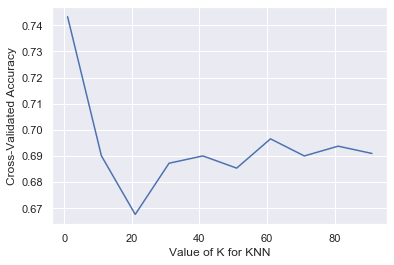

In [726]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

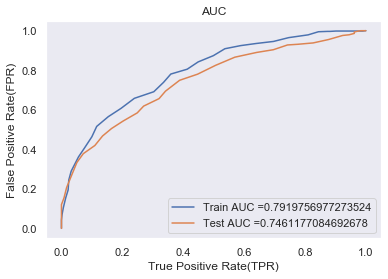

In [727]:
#KNN classifier sklearn : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=41)
neigh.fit(X_train, y_train)

y_train_pred = neigh.predict_proba(X_train)  
y_test_pred = neigh.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)

#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Classification Report

In [728]:
y_pred=neigh.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.61      0.64       237
         1.0       0.70      0.75      0.73       291

    accuracy                           0.69       528
   macro avg       0.68      0.68      0.68       528
weighted avg       0.69      0.69      0.69       528

0.6875


## Confusion Matrix

In [163]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [164]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr

from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[100  54]
 [ 14  75]]


In [165]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

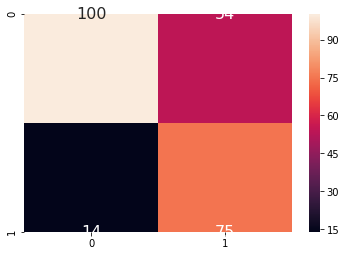

In [166]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Model 2 : Naive Bayes

In [729]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

mnb = MultinomialNB()

parameters = {'alpha': range(1,100,10)}

clf = GridSearchCV(mnb, parameters, cv= 5, scoring='roc_auc')

clf.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='warn', n_jobs=None, param_grid={'alpha': range(1, 100, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [730]:
clf.best_params_

{'alpha': 91}

In [733]:
from sklearn.model_selection import cross_val_score
alpha = range(80,150,10)
k_scores = []


for k in alpha:
  
    mnb = MultinomialNB(alpha=k)
    
    scores = cross_val_score(mnb,X_train, y_train, cv=10, scoring='accuracy')
   
    k_scores.append(scores.mean())
print(k_scores)

[0.5322170301142263, 0.5322170301142263, 0.5322170301142263, 0.5322170301142263, 0.5322170301142263, 0.5322170301142263, 0.5322170301142263]


Text(0, 0.5, 'Cross-Validated Accuracy')

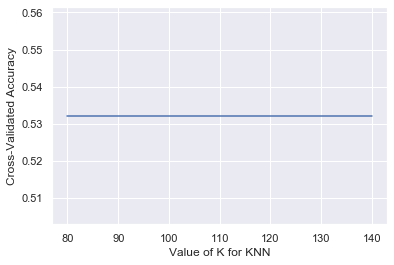

In [734]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(alpha, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

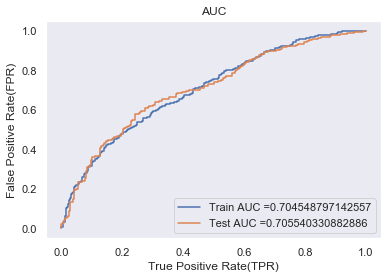

In [735]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB(alpha=91)
mnb.fit(X_train, y_train)

y_train_pred = mnb.predict_proba(X_train)  
y_test_pred = mnb.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)

#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Classification Report

In [736]:
y_pred=mnb.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       237
         1.0       0.55      1.00      0.71       291

    accuracy                           0.55       528
   macro avg       0.28      0.50      0.36       528
weighted avg       0.30      0.55      0.39       528

0.5511363636363636


## Confusion Matrix

In [737]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [738]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr

from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[191  46]
 [154 137]]


In [739]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

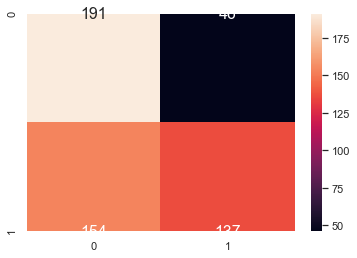

In [740]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Model 3 : Logistic Regression 

In [741]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

model = GridSearchCV(LogisticRegression(),parameters, scoring = 'roc_auc', cv=5)
model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
0.8244423433834086


In [742]:
model.best_params_

{'C': 10000}

In [743]:
from sklearn.model_selection import cross_val_score

C= [10**-4, 10**-2, 10**0, 10**2, 10**4]
k_scores = []

for k in C:
    #
    Lr = LogisticRegression(C=k)
    
    scores = cross_val_score(Lr,X_train, y_train, cv=10, scoring='accuracy')
    
    k_scores.append(scores.mean())
print(k_scores)

[0.5322170301142263, 0.5322170301142263, 0.531282450674974, 0.709614053305642, 0.7516787815853238]


In [744]:
import math as mt
log_C=[]
for i in C:
     log_C.append(mt.log10(i))

Text(0, 0.5, 'Cross-Validated Accuracy')

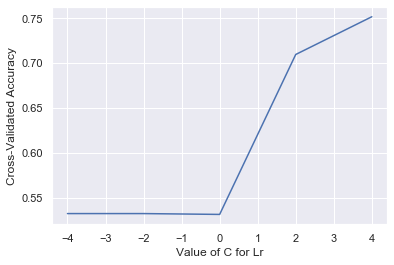

In [745]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(log_C, k_scores)
plt.xlabel('Value of C for Lr')
plt.ylabel('Cross-Validated Accuracy')

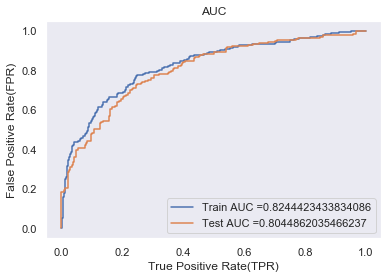

In [746]:
from sklearn.metrics import roc_curve, auc

Lr = LogisticRegression(C=10000)
Lr.fit(X_train, y_train)

y_train_pred = Lr.predict_proba(X_train)  
y_test_pred = Lr.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)
#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Classification Report

In [747]:
y_pred=Lr.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.69      0.73      0.71       237
         1.0       0.77      0.74      0.75       291

    accuracy                           0.73       528
   macro avg       0.73      0.73      0.73       528
weighted avg       0.74      0.73      0.74       528

0.7348484848484849


## Confusion Matrix

In [748]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [749]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr

from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[199  38]
 [120 171]]


In [750]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

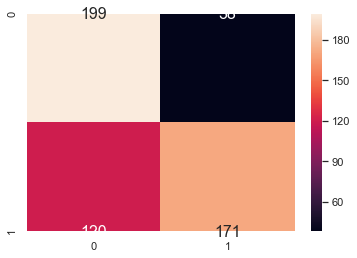

In [751]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Model 3 : Linear regression 

In [48]:
# we can't use linear regression as its a pure regression model 


# Model 4 : SVM

In [752]:
from sklearn.svm import SVC

parameters = [{'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}]   #'poly','sigmoid' takes too much time

model = GridSearchCV(SVC(),parameters, scoring = 'roc_auc', cv=5)
model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
0.8257695136043701


In [753]:
model.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [754]:
from sklearn.model_selection import cross_val_score

C= [10**-4, 10**-2, 10**0, 10**2, 10**4]
k_scores = []

for k in C:
    #
    svm = SVC(C=k,gamma= 0.0001,kernel='rbf')
    
    scores = cross_val_score(svm,X_train, y_train, cv=10, scoring='accuracy')
    
    k_scores.append(scores.mean())
print(k_scores)

[0.5322170301142263, 0.5322170301142263, 0.5322170301142263, 0.5322170301142263, 0.5322170301142263]


In [755]:
import math as mt
log_C=[]
for i in C:
     log_C.append(mt.log10(i))

Text(0, 0.5, 'Cross-Validated Accuracy')

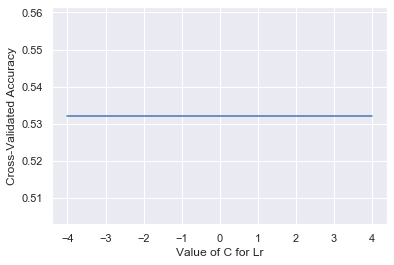

In [756]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(log_C, k_scores)
plt.xlabel('Value of C for Lr')
plt.ylabel('Cross-Validated Accuracy')

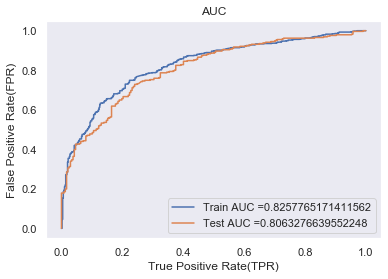

In [757]:
from sklearn.svm import SVC

svm = SVC(C=1000,gamma=1,kernel= 'rbf',probability=True)

svm.fit(X_train, y_train)


y_train_pred = svm.predict_proba(X_train)  
y_test_pred = svm.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)
#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()
print()

# Classification Report

In [758]:
y_pred=svm.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.69      0.76      0.72       237
         1.0       0.79      0.72      0.75       291

    accuracy                           0.74       528
   macro avg       0.74      0.74      0.74       528
weighted avg       0.74      0.74      0.74       528

0.7367424242424242


## Confusion Matrix

In [759]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [760]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[198  39]
 [121 170]]


In [761]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

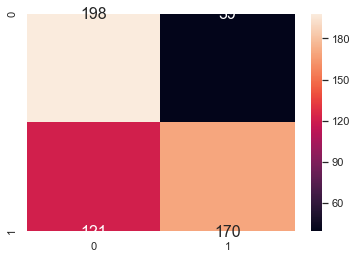

In [762]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Model 5 : Decision Tree

In [771]:
from sklearn.tree import DecisionTreeClassifier
#min_samples_split :The minimum number of samples required to split an internal node, if less than this number can't split

parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 100],'min_samples_split':[5, 10, 100, 500]}

clf = DecisionTreeClassifier()

model = GridSearchCV(clf,parameters, scoring = 'roc_auc', cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=500,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [772]:
model.best_params_

{'max_depth': 500, 'min_samples_split': 100}

In [719]:
from sklearn.model_selection import cross_val_score

max_depth= [1,5,15,25,50,100]
k_scores = []

for k in max_depth:
    #
    DT = DecisionTreeClassifier(max_depth=k, min_samples_split=100)
    
    scores = cross_val_score(DT,X_train, y_train, cv=10, scoring='accuracy')
    
    k_scores.append(scores.mean())
print(k_scores)

[0.6928781585323642, 0.7022066458982347, 0.7059363101419176, 0.7059363101419176, 0.7059363101419176, 0.7059363101419176]


Text(0, 0.5, 'Cross-Validated Accuracy')

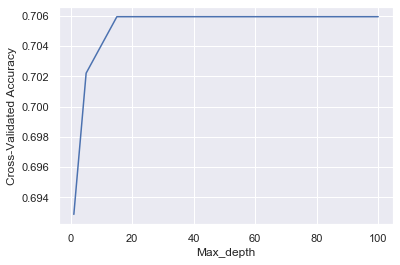

In [720]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(max_depth, k_scores)
plt.xlabel('Max_depth')
plt.ylabel('Cross-Validated Accuracy')

# Tried without hyperparameters

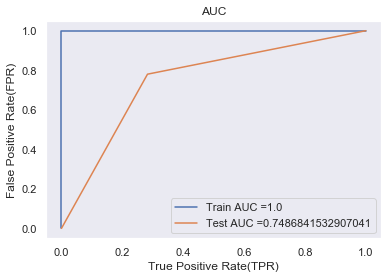

In [676]:
DT = DecisionTreeClassifier()

DT.fit(X_train, y_train)


y_train_pred = DT.predict_proba(X_train)  
y_test_pred = DT.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)
#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()
print()

## Overfitting on train data as we are training very deep trees 

# Traning with best hyperparameters

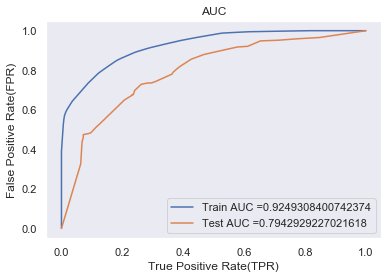

In [774]:
DT = DecisionTreeClassifier(max_depth=10,min_samples_split=40)

DT.fit(X_train, y_train)


y_train_pred = DT.predict_proba(X_train)  
y_test_pred = DT.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)
#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()
print()

# Classification Report

In [775]:
from sklearn.metrics import roc_auc_score
y_pred=DT.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.69      0.72      0.70       237
         1.0       0.76      0.74      0.75       291

    accuracy                           0.73       528
   macro avg       0.72      0.73      0.73       528
weighted avg       0.73      0.73      0.73       528

0.7272727272727273
0.726347383531254


## Confusion Matrix

In [776]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [777]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[112 125]
 [ 29 262]]


In [778]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

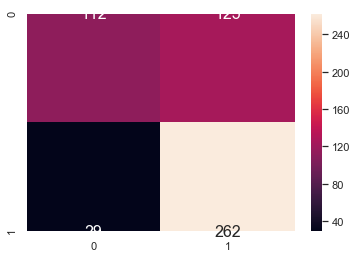

In [779]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

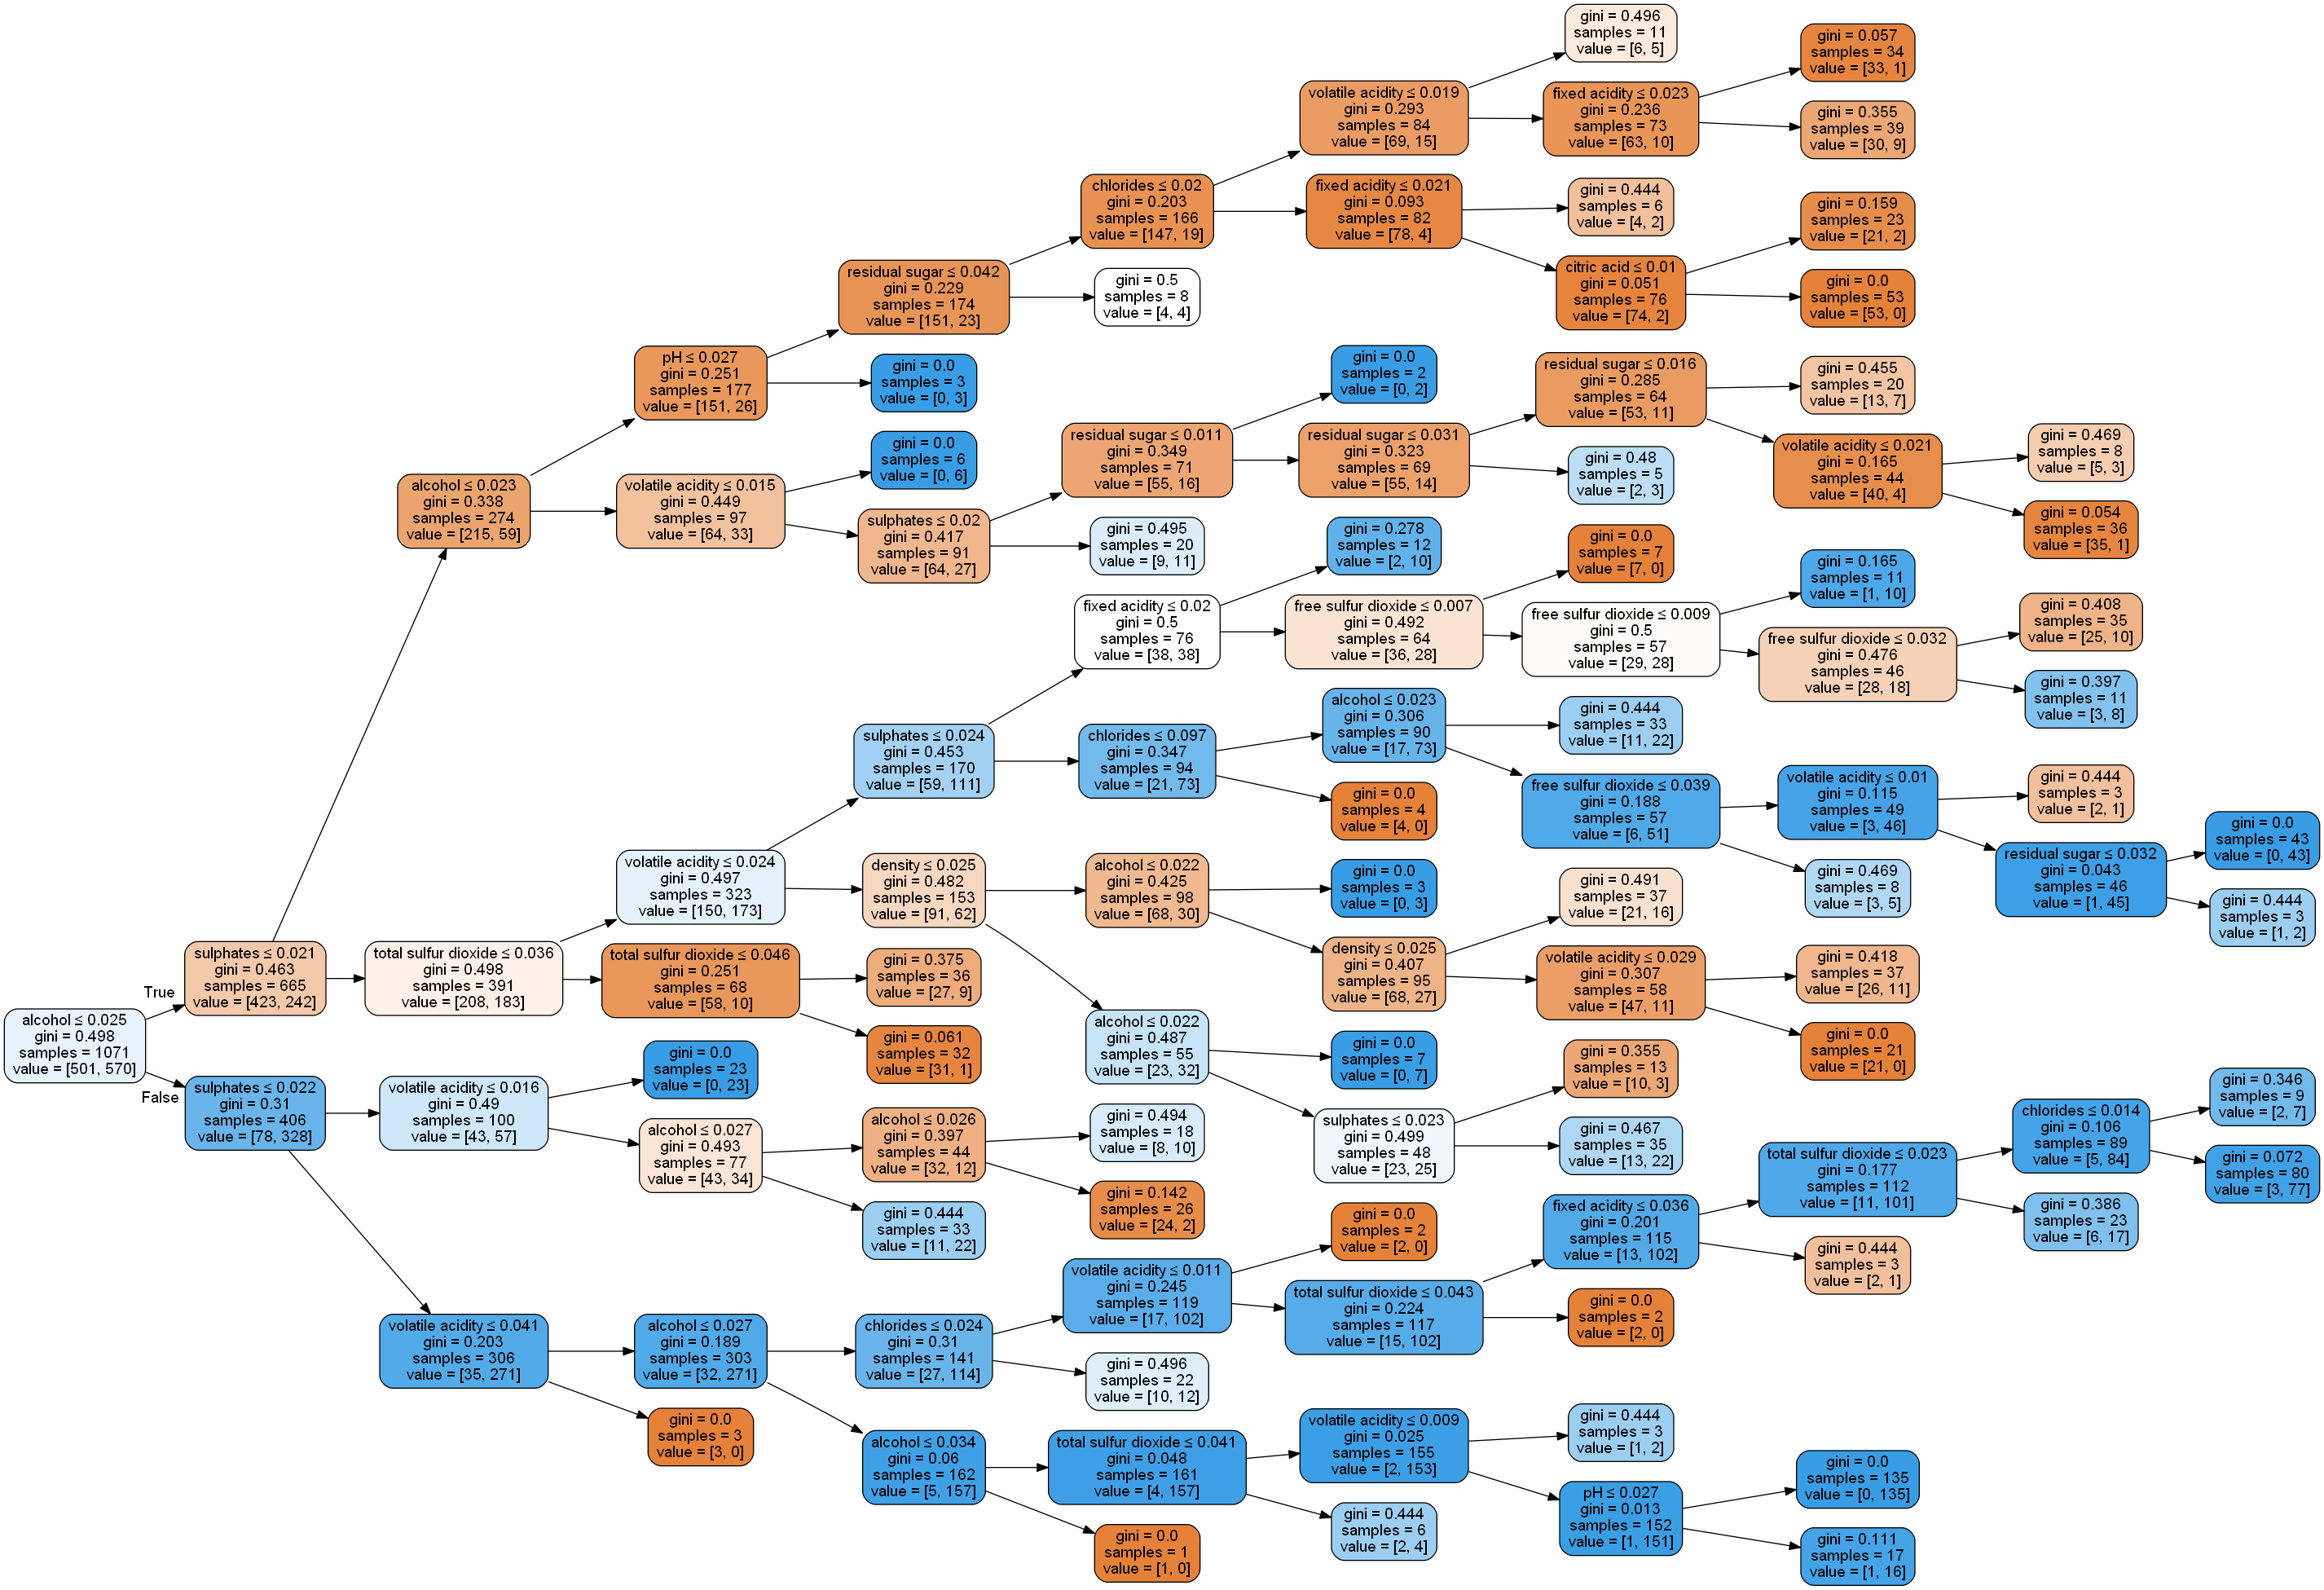

In [780]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.externals.six import StringIO

dot_data = StringIO()

export_graphviz(DT, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=X_train.columns,rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

# Model 6 : Ensemble Techniques 

## A. Bagging

In [684]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


parameters = {'max_depth': [5, 10, 50, 100],'n_estimators':[10, 20 , 50, 100]}

clf = RandomForestClassifier()

model = GridSearchCV(clf,parameters, scoring = 'roc_auc', cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
1.0


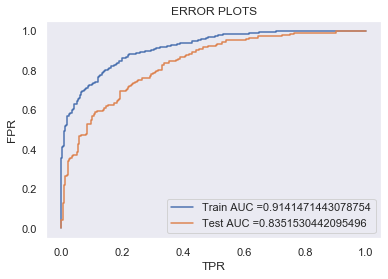

In [685]:
from sklearn.model_selection import GridSearchCV

RF=RandomForestClassifier(max_depth=5,n_estimators=100,class_weight='balanced')
RF.fit(X_train, y_train)


y_train_pred =  RF.predict_proba(X_train)[:,1]      
y_test_pred =  RF.predict_proba(X_test)[:,1]  

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))



plt.legend()
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

# Classification Report

In [686]:
y_pred=RF.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.70      0.77      0.73       237
         1.0       0.80      0.73      0.76       291

    accuracy                           0.75       528
   macro avg       0.75      0.75      0.75       528
weighted avg       0.75      0.75      0.75       528

0.7462121212121212


## Confusion Matrix

In [687]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

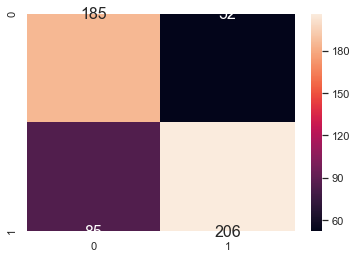

In [688]:
test_df = pd.DataFrame(confusion_matrix(y_test,find_y_pred_by_best_threshold(y_test_pred, tr_thresholds,train_fpr,train_tpr)), range(2),range(2))
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Boosting

In [689]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier


parameters = {'max_depth': [5, 10, 50, 100],'n_estimators':[10, 20 , 50, 100]}

clf = GradientBoostingClassifier()

model = GridSearchCV(clf,parameters, scoring = 'roc_auc', cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_test, y_test))


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
0.8613829802659242


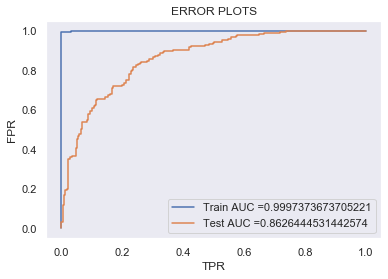

In [691]:
from sklearn.model_selection import GridSearchCV

GBDT=GradientBoostingClassifier(max_depth=5,n_estimators=100)
GBDT.fit(X_train, y_train)


y_train_pred =  GBDT.predict_proba(X_train)[:,1]      
y_test_pred =  GBDT.predict_proba(X_test)[:,1]  

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))



plt.legend()
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [692]:
y_pred=GBDT.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.76      0.77       237
         1.0       0.81      0.82      0.81       291

    accuracy                           0.79       528
   macro avg       0.79      0.79      0.79       528
weighted avg       0.79      0.79      0.79       528

0.7935606060606061


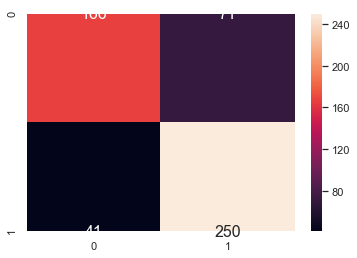

In [693]:
test_df = pd.DataFrame(confusion_matrix(y_test,find_y_pred_by_best_threshold(y_test_pred, tr_thresholds,train_fpr,train_tpr)), range(2),range(2))
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Stacking

## Note: As we have very less data stascking is not advisable 

## Tried using SGDclassifier with different types of loss 

In [694]:
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [695]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(X_train, y_train)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(X_train, y_train)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(X_train, y_train)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(X_train, y_train)
#print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_onehotCoding))))
sig_clf2.fit(X_train, y_train)
#print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_onehotCoding))))
sig_clf3.fit(X_train, y_train)
#print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_onehotCoding))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(X_train, y_train)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(y_test, sclf.predict_proba(X_test))))
    log_error =log_loss(y_test, sclf.predict_proba(X_test))
    if best_alpha > log_error:
        best_alpha = log_error

--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 0.692
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 0.685
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 0.654
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 0.627
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 0.625
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 0.624


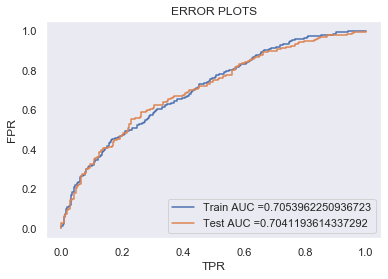

In [696]:
lr = LogisticRegression(C=10)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(X_train, y_train)


y_train_pred =  sclf.predict_proba(X_train)[:,1]      
y_test_pred =  sclf.predict_proba(X_test)[:,1]  

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))



plt.legend()
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

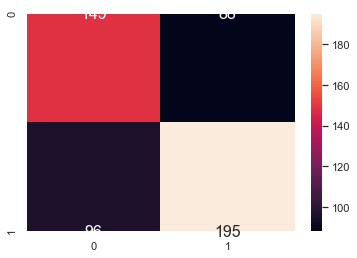

In [697]:
## Confusion Matrix

def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

test_df = pd.DataFrame(confusion_matrix(y_test,find_y_pred_by_best_threshold(y_test_pred, tr_thresholds,train_fpr,train_tpr)), range(2),range(2))
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

## XGBoost

[19:53:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


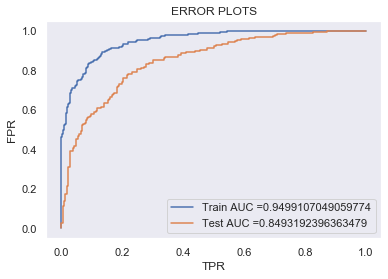

In [698]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(random_state=42)

xgb_model.fit(X_train, y_train)


y_train_pred =  xgb_model.predict(X_train)      
y_test_pred =  xgb_model.predict(X_test) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))



plt.legend()
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

# 6.Model Comparison

In [1]:
#https://stackoverflow.com/questions/18601688/python-prettytable-example

from prettytable import PrettyTable
table = PrettyTable()

#setting column names
table.field_names = [ "Sr.No","Model", "AUC", "Accuracy"]

#setting row values
table.add_row(['1',"KNN", '74.61','68.21' ])
table.add_row(['2',"Naive Bayes",'70.55' ,'55' ])
table.add_row(['3',"Logistic Regression", '80.44','73.87' ])
table.add_row(['4',"SVM", '80.70','73.67' ])
table.add_row(['5',"Decision Tree",'79.49' ,'72.79' ])
table.add_row(['6',"RandomForest",'83.51' ,'74.61' ])
table.add_row(['7',"GBDT",'86.26' ,'79.35' ])
table.add_row(['8',"Xgboost",'84.93' ,'--' ])
table.add_row(['9',"Stacking", '70.41','--' ])
print(table)

+-------+---------------------+-------+----------+
| Sr.No |        Model        |  AUC  | Accuracy |
+-------+---------------------+-------+----------+
|   1   |         KNN         | 74.61 |  68.21   |
|   2   |     Naive Bayes     | 70.55 |    55    |
|   3   | Logistic Regression | 80.44 |  73.87   |
|   4   |         SVM         | 80.70 |  73.67   |
|   5   |    Decision Tree    | 79.49 |  72.79   |
|   6   |     RandomForest    | 83.51 |  74.61   |
|   7   |         GBDT        | 86.26 |  79.35   |
|   8   |       Xgboost       | 84.93 |    --    |
|   9   |       Stacking      | 70.41 |    --    |
+-------+---------------------+-------+----------+


Summary:<br>
1.GBDT best model amongst all with AUC of 86.26.<br>
2.As the data is imbalanced the accuracy score is affected.<br>
3.Ensembles like Xgboost ,staking doesn't perform very well due to very amount of data

# 7.Creating Submission File

In [163]:
best_model=GBDT
from sklearn.externals import joblib
filename = 'finalized_model.sav'
joblib.dump(best_model, filename)

['finalized_model.sav']